# Load Libraries

In [117]:
import pandas as pd
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

# Load Data

In [118]:
filepath = "/Users/Kapil/PycharmProjects/stock-price"
train = pd.read_csv(filepath + "/data/train.csv")
test = pd.read_csv(filepath + "/data/test.csv")

In [119]:
SEED = 13
np.random.seed(SEED)

In [120]:
train.shape

(2026, 6)

In [129]:
train.head()

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0


In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2026 non-null   object 
 1   Open    2026 non-null   float64
 2   High    2026 non-null   float64
 3   Low     2026 non-null   float64
 4   Close   2026 non-null   float64
 5   Up      2026 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 95.1+ KB


In [122]:
Y_train = train['Up']
X_train = train.drop(['Up'], axis = 1)

X_test = test

In [123]:
X_train.head()



,Date,Open,High,Low,Close
0,2004-01-02,50.85,50.91,50.62,50.72
1,2004-01-05,50.75,50.84,50.61,50.79
2,2004-01-06,50.87,51.26,50.86,51.15
3,2004-01-07,51.45,51.54,51.29,51.51
4,2004-01-08,51.15,51.33,51.02,51.28


In [124]:
X_train.describe()

,Open,High,Low,Close
count,2026.000000,2026.000000,2026.000000,2026.000000
mean,72.338425,72.714126,71.977957,72.353968
std,14.876363,14.968429,14.778285,14.874404
min,50.430000,50.650000,50.400000,50.610000
25%,57.702500,57.942500,57.415000,57.702500
50%,73.970000,74.430000,73.325000,73.835000
75%,81.230000,81.645000,80.717500,81.060000
max,110.510000,111.020000,110.380000,110.810000


In [125]:
close_max = X_train['Close'].max()
close_max

110.81

In [126]:
close_max_id = X_train['Close'].idxmax()
X_train['Date'].iloc[close_max_id]

'2011-12-27'

In [127]:
X_train['Return'] = X_train['Close'].pct_change()

In [128]:
X_train['Date'] = pd.to_datetime(X_train['Date'], format='%Y-%m-%d')
X_train['Day'] = X_train['Date'].dt.strftime('%d')
X_train['Month'] = X_train['Date'].dt.strftime('%m')
X_train['Year'] = X_train['Date'].dt.strftime('%Y')
X_train['Weekday'] = X_train['Date'].dt.strftime('%a')


In [134]:
mean = X_train['Return'].mean()
std = X_train['Return'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = 0.00043342689599721576
Std deviation = 0.009846179655984843


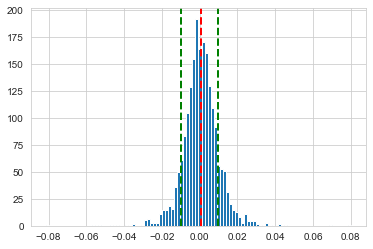

In [141]:
#X_train['Return'].hist()
X_train['Return'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
plt.savefig('1.jpg')

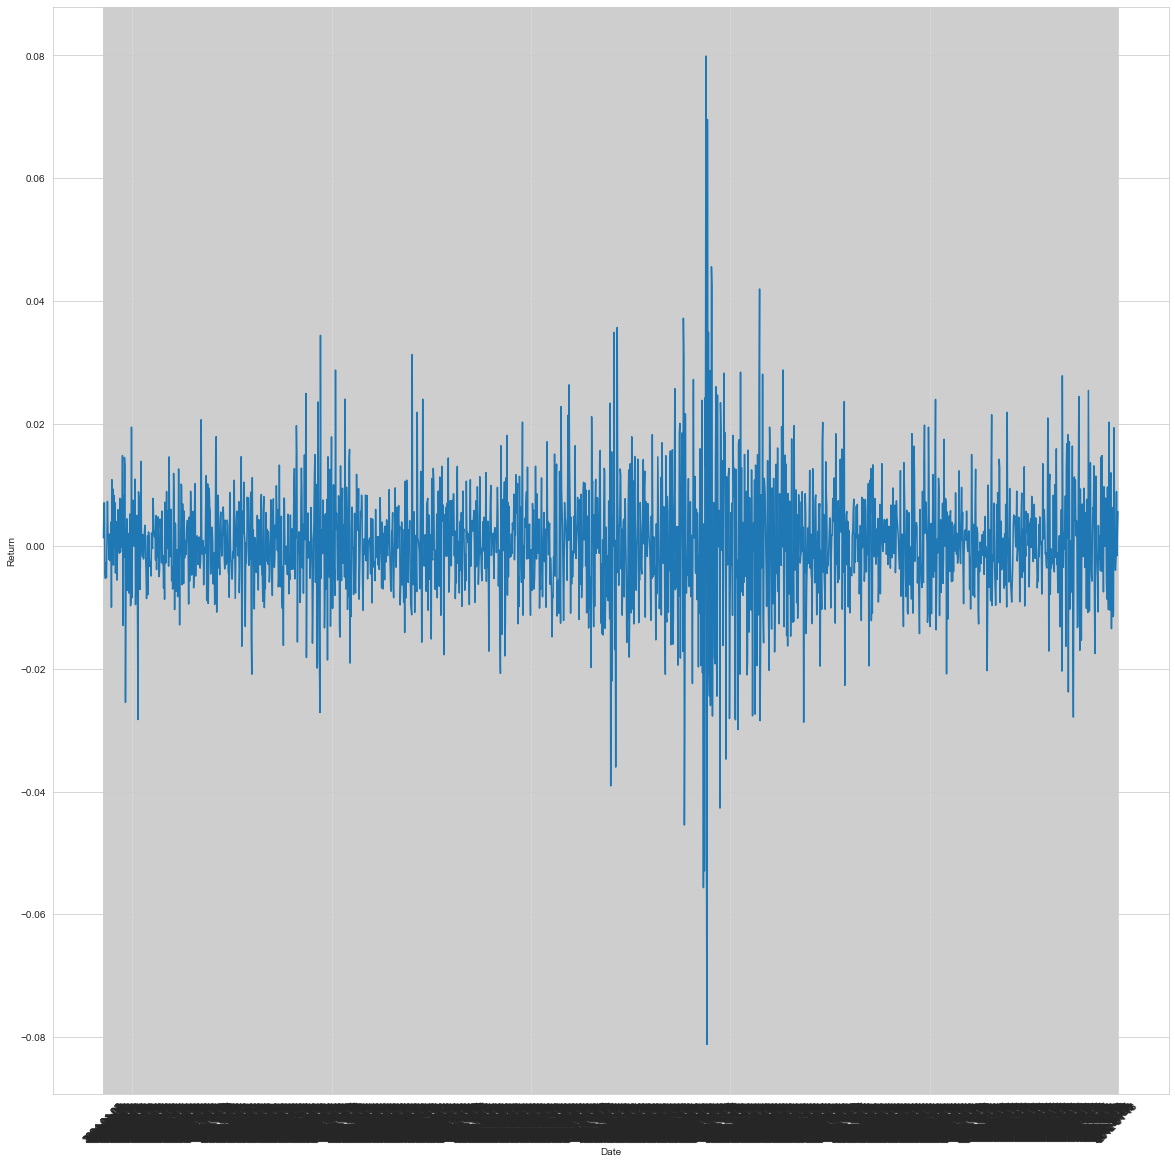

In [98]:
plt.figure(figsize=(20,20))
plt.plot('Date','Return', data=X_train)
plt.xlabel('Date')
plt.ylabel('Return')
plt.xticks(rotation=45)
plt.show()

SyntaxError: invalid syntax (<ipython-input-101-a6881b3d146f>, line 3)